### Análisis Exploratorio de Datos (EDA) de la api

En este notebook realizaremos un EDA detallado de la api con imformacion sobre albunes .

 ## Importación de librerías

In [6]:
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import json
import numpy as np
import os

In [18]:
# Leer archivo desde la ruta proporcionada por el usuario
albums_raw_path = '/home/ubuntu/Escritorio/workshop2/data/albums_raw.json'

# Cargar datos
with open(albums_raw_path, "r", encoding="utf-8") as file:
    albums_data = json.load(file)

# Convertir a DataFrame
albums_df_path = pd.DataFrame(albums_data["album"])

# Mostrar primeras filas para asegurar lectura correcta
albums_df_path.head()



,idAlbum,idArtist,idLabel,strAlbum,strAlbumStripped,strArtist,strArtistStripped,intYearReleased,strStyle,strGenre,...,strDiscogsID,strWikidataID,strWikipediaID,strGeniusID,strLyricWikiID,strMusicMozID,strItunesID,strAmazonID,strLocked,strDescription
0,2115886,112024,47129,Thursday,Thursday,The Weeknd,The Weeknd,2011,Urban/R&B,R&B,...,None,None,None,Thursday,None,None,None,None,unlocked,NaN
1,2115887,112024,47129,House of Balloons,House of Balloons,The Weeknd,The Weeknd,2011,Urban/R&B,R&B,...,399733,Q5914723,House_of_Balloons,House-of-balloons,None,None,None,None,unlocked,NaN
2,2115888,112024,47129,Echoes of Silence,Echoes of Silence,The Weeknd,The Weeknd,2011,Urban/R&B,R&B,...,399750,None,None,Echoes-of-silence,None,None,None,None,unlocked,NaN
3,2126189,112024,47129,Trilogy,Trilogy,The Weeknd,The Weeknd,2012,Urban/R&B,R&B,...,None,None,Trilogy_(The_Weeknd_album),Trilogy,None,None,None,None,unlocked,NaN
4,2232390,112024,47129,Kiss Land,Kiss Land,The Weeknd,The Weeknd,2013,Urban/R&B,R&B,...,596234,Q17018194,Kiss_Land,Kiss-land,None,None,None,None,unlocked,NaN


In [19]:
albums_df_path["intYearReleased"] = pd.to_numeric(albums_df_path["intYearReleased"], errors="coerce")
albums_df_path["intScore"] = pd.to_numeric(albums_df_path["intScore"], errors="coerce")
albums_df_path["intScoreVotes"] = pd.to_numeric(albums_df_path["intScoreVotes"], errors="coerce")

In [26]:
albums_df_path.shape


(30, 60)

In [31]:
# Conteo general de categorías clave en el dataset de álbumes

print("🎵 Álbumes únicos:", albums_df_path["idAlbum"].nunique())
print("🎤 Artistas únicos:", albums_df_path["idArtist"].nunique())
print("🏷️ Sellos discográficos únicos:", albums_df_path["idLabel"].nunique())
print("📅 Años únicos de lanzamiento:", albums_df_path["intYearReleased"].nunique())
print("🎼 Estilos únicos:", albums_df_path["strStyle"].nunique())
print("🎧 Géneros únicos:", albums_df_path["strGenre"].nunique())

print("✔️ Con Discogs ID:", albums_df_path["strDiscogsID"].notna().sum())
print("✔️ Con Wikidata ID:", albums_df_path["strWikidataID"].notna().sum())
print("✔️ Con Wikipedia ID:", albums_df_path["strWikipediaID"].notna().sum())
print("✔️ Con Genius ID:", albums_df_path["strGeniusID"].notna().sum())


🎵 Álbumes únicos: 30
🎤 Artistas únicos: 1
🏷️ Sellos discográficos únicos: 2
📅 Años únicos de lanzamiento: 14
🎼 Estilos únicos: 2
🎧 Géneros únicos: 2
✔️ Con Discogs ID: 5
✔️ Con Wikidata ID: 3
✔️ Con Wikipedia ID: 5
✔️ Con Genius ID: 7


/tmp/ipykernel_351455/3784558354.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=albums_by_year.index, y=albums_by_year.values, palette="coolwarm")


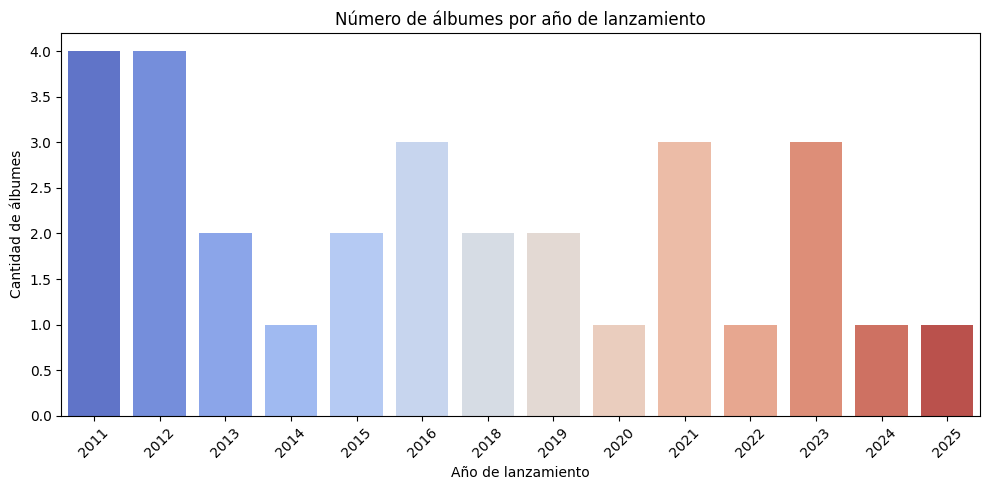

In [33]:
albums_df_path["intYearReleased"] = pd.to_numeric(albums_df_path["intYearReleased"], errors="coerce")


albums_by_year = albums_df_path["intYearReleased"].value_counts().sort_index()


plt.figure(figsize=(10, 5))
sns.barplot(x=albums_by_year.index, y=albums_by_year.values, palette="coolwarm")

# Estética del gráfico
plt.title("Número de álbumes por año de lanzamiento")
plt.xlabel("Año de lanzamiento")
plt.ylabel("Cantidad de álbumes")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()